In [2]:
import numpy as np
# import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
# from mpl_toolkits.basemap import Basemap
# from scipy.io import loadmat
from cmocean import cm
import glob
import pandas as pd
import warnings
import pickle
import arrow
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy
#from cartopy import crs, feature
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from salishsea_tools import viz_tools
import netCDF4 as nc
import gsw

#import LambertConformalTicks as lct

%matplotlib inline
plt.rcParams['font.size'] = 11
warnings.simplefilter('ignore')

In [64]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mythical code button"></form>''')

In [3]:
# jdf_x = 85; jdf_y = 325; jdf_col = 'teal'
# jdf2_x = 50; jdf2_y = 370; jdf2_col = 'mediumaquamarine'
# jdf3_x = 130; jdf3_y = 290; jdf3_col = 'lightseagreen'

# cs_x = 250; cs_y = 500; cs_col = 'royalblue'
# cs2_x = 280; cs2_y = 440; cs2_col = 'navy'
# cs3_x = 220; cs3_y = 540; cs3_col = 'dodgerblue'

# haro_x = 230; haro_y = 310; haro_col = 'tomato'
# haro2_x = 340; haro2_y = 290; haro2_col = 'firebrick'
# haro3_x = 260; haro3_y = 335; haro3_col = 'indianred'


# ns_x = 160; ns_y = 680; ns_col = 'olive'
# ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
# ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'


# w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
# pco2 = w['model_output']['pCO2'][:]
# pco2[pco2>2e5] = np.nan
# pco2[pco2<2000] = 500
# fact = 1.5
# fig = plt.figure(figsize=(12*fact,6.5*fact))

# ax0 = fig.add_subplot(1,2,1)
# #toba and bute

# im = ax0.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
# viz_tools.set_aspect(ax0)
# #jdf
# rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
# ax0.add_patch(rect_jdf)
# rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
# ax0.add_patch(rect_jdf)
# rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
# ax0.add_patch(rect_jdf)

# rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
# ax0.add_patch(rect_haro)
# rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
# ax0.add_patch(rect_haro)
# rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
# ax0.add_patch(rect_haro)

# rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
# ax0.add_patch(rect_cs)
# rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
# ax0.add_patch(rect_cs)
# rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
# ax0.add_patch(rect_cs)

# rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
# ax0.add_patch(rect_ns)
# ax0.text(ns_x+20,ns_y-10,'NS')
# rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
# ax0.add_patch(rect_ns)
# ax0.text(ns2_x+20,ns2_y-10,'NS2')
# rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
# ax0.add_patch(rect_ns)
# ax0.text(ns3_x+20,ns3_y-10,'NS3')

# ax0.set_title('individual stations')



(600.0, 800.0)

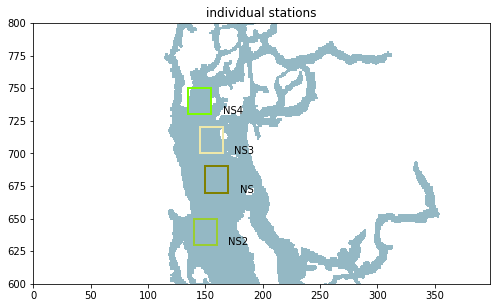

In [50]:
ns_x = 160; ns_y = 680; ns_col = 'olive'
ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'
ns4_x = 145; ns4_y = 740; ns4_col = 'lawngreen'

w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
pco2 = w['model_output']['pCO2'][:]
pco2[pco2>2e5] = np.nan
pco2[pco2<2000] = 500
fact = 1.5
fig = plt.figure(figsize=(12*fact,6.5*fact))

ax0 = fig.add_subplot(1,2,1)
#toba and bute

im = ax0.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax0)

rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor='none')
ax0.add_patch(rect_ns)
ax0.text(ns_x+20,ns_y-10,'NS')
rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor='none')
ax0.add_patch(rect_ns)
ax0.text(ns2_x+20,ns2_y-10,'NS2')
rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor='none')
ax0.add_patch(rect_ns)
ax0.text(ns3_x+20,ns3_y-10,'NS3')
rect_ns = Rectangle((ns4_x-10,ns4_y-10),20,20,linewidth=2,edgecolor=ns4_col,facecolor='none')
ax0.add_patch(rect_ns)
ax0.text(ns4_x+20,ns4_y-10,'NS4')

ax0.set_title('individual stations')

ax0.set_ylim([600,800])

In [13]:
def OmA_2D(grid,carp):
    tsal = grid['vosaline'][0,0,:,:]
    ttemp = grid['votemper'][0,0,:,:]
    tdic = carp['dissolved_inorganic_carbon'][0,0,:,:]
    tta = carp['total_alkalinity'][0,0,:,:]

    tsra = np.ravel(tsal)
    ttera = np.ravel(ttemp)
    ttara = np.ravel(tta) * 1e-3
    tdra = np.ravel(tdic) * 1e-3
    tzero = np.zeros_like(tsra)
    tpressure = np.zeros_like(tsra)
    tpressure[:] =1
    tzero = tpressure * 0 
        
    tsra_psu = tsra*35/35.16504
    ttera_is = gsw.t_from_CT(tsra,ttera,tzero)

    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tzero, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

    pHr = pH.reshape(898,398)
    OmAr = OmegaA.reshape(898,398)
    OmCr = OmegaC.reshape(898,398)
    pco2r = pco2.reshape(898,398)
    
    return pHr, OmAr, OmCr, pco2r

In [31]:
# start ='2020-01-01'
# end ='2020-12-31'
# yrstr = '20'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array1 = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array1.append(r)
# dayslen = len(arrow_array1)

# pco2_2020 = np.zeros([dayslen,4])
# nit_10m_2020 = np.zeros([dayslen,4])
# diat_10m_2020 = np.zeros([dayslen,4])
# flag_10m_2020 = np.zeros([dayslen,4])
# microzoo_10m_2020 = np.zeros([dayslen,4])

# for i in range(0,1):#dayslen):

#     tdate = arrow_array1[i][0]
#     ymd = tdate.format('YYYYMMDD')
#     DD = tdate.format('DD')
#     mon = tdate.format('MMM').lower()
#     yd = f'{DD}{mon}{yrstr}'
    
#     if i%10 == 0:
#         print(ymd)
#     tstr = glob.glob(f'/results2/SalishSea/nowcast-green.201905/{yd}/SalishSea_1d_*{ymd}*carp_T.nc')
#     tnc = tstr[0]; tn_carp = nc.Dataset(tnc)
    
#     tstr = glob.glob(f'/results2/SalishSea/nowcast-green.201905/{yd}/SalishSea_1d_*{ymd}*grid_T.nc')
#     tnc = tstr[0]; tn_grid = nc.Dataset(tnc)
#     pHr, OmAr, OmCr, pco2r = OmA_2D(tn_grid,tn_carp)
#     #print(np.max(pco2r))
#     pco2r[pco2r>1e10] = np.nan
#     tstr = glob.glob(f'/results2/SalishSea/nowcast-green.201905/{yd}/SalishSea_1d_*{ymd}*ptrc_T.nc')
#     tnc = tstr[0]; tn_ptrc = nc.Dataset(tnc)
#     pco2_2020[i,0] = np.nanmean(pco2r[ns_y-10:ns_y+10,ns_x-10:ns_x+10])
#     pco2_2020[i,1] = np.nanmean(pco2r[ns2_y-10:ns2_y+10,ns2_x-10:ns2_x+10])
#     pco2_2020[i,2] = np.nanmean(pco2r[ns3_y-10:ns3_y+10,ns3_x-10:ns3_x+10])
#     pco2_2020[i,3] = np.nanmean(pco2r[ns4_y-10:ns4_y+10,ns4_x-10:ns4_x+10])
    
#     nit = tn_ptrc['nitrate'][:]; nit[nit == 0] = np.nan
#     diat = tn_ptrc['diatoms'][:]; diat[diat == 0] = np.nan
#     flag = tn_ptrc['flagellates'][:]; flag[flag == 0] = np.nan
#     microzoo = tn_ptrc['microzooplankton'][:]; microzoo[microzoo == 0] = np.nan
    
#     nit_10m_2020[i,0] = np.nanmean(nit[0,0:10,ns_y-10:ns_y+10,ns_x-10:ns_x+10])
#     nit_10m_2020[i,1] = np.nanmean(nit[0,0:10,ns2_y-10:ns2_y+10,ns2_x-10:ns2_x+10])
#     nit_10m_2020[i,2] = np.nanmean(nit[0,0:10,ns3_y-10:ns3_y+10,ns3_x-10:ns3_x+10])
#     nit_10m_2020[i,3] = np.nanmean(nit[0,0:10,ns4_y-10:ns4_y+10,ns4_x-10:ns4_x+10])

#     diat_10m_2020[i,1] = np.nanmean(diat[0,0:10,ns2_y-10:ns2_y+10,ns2_x-10:ns2_x+10])
#     diat_10m_2020[i,0] = np.nanmean(diat[0,0:10,ns_y-10:ns_y+10,ns_x-10:ns_x+10])
#     diat_10m_2020[i,2] = np.nanmean(diat[0,0:10,ns3_y-10:ns3_y+10,ns3_x-10:ns3_x+10])
#     diat_10m_2020[i,3] = np.nanmean(diat[0,0:10,ns4_y-10:ns4_y+10,ns4_x-10:ns4_x+10])

#     flag_10m_2020[i,1] = np.nanmean(flag[0,0:10,ns2_y-10:ns2_y+10,ns2_x-10:ns2_x+10])
#     flag_10m_2020[i,0] = np.nanmean(flag[0,0:10,ns_y-10:ns_y+10,ns_x-10:ns_x+10])
#     flag_10m_2020[i,2] = np.nanmean(flag[0,0:10,ns3_y-10:ns3_y+10,ns3_x-10:ns3_x+10])
#     flag_10m_2020[i,3] = np.nanmean(flag[0,0:10,ns4_y-10:ns4_y+10,ns4_x-10:ns4_x+10])

#     microzoo_10m_2020[i,1] = np.nanmean(microzoo[0,0:10,ns2_y-10:ns2_y+10,ns2_x-10:ns2_x+10])
#     microzoo_10m_2020[i,0] = np.nanmean(microzoo[0,0:10,ns_y-10:ns_y+10,ns_x-10:ns_x+10])
#     microzoo_10m_2020[i,2] = np.nanmean(microzoo[0,0:10,ns3_y-10:ns3_y+10,ns3_x-10:ns3_x+10])
#     microzoo_10m_2020[i,3] = np.nanmean(microzoo[0,0:10,ns4_y-10:ns4_y+10,ns4_x-10:ns4_x+10])

            
# # pickle.dump(nit_10m_2020, open("./pkls/nit_10m_2020.pkl", 'wb'))
# # pickle.dump(diat_10m_2020, open("./pkls/diat_10m_2020.pkl", 'wb'))
# # pickle.dump(pco2_2020, open("./pkls/pco2_2020.pkl", 'wb'))
# # pickle.dump(microzoo_10m_2020, open("./pkls/microzoo_10m_2020.pkl", 'wb'))
# # pickle.dump(flag_10m_2020, open("./pkls/flag_10m_2020.pkl", 'wb'))





20200101
24.395139694213867


In [26]:
w = tn_ptrc['nitrate'][0,0:10,ns4_y-10:ns4_y+10,ns4_x-10:ns4_x+10]
print(np.nanmin(w))
print(np.nanmax(w[w>0]))
print(np.nanmin(w[w>0]))

0.0
25.737383
23.820704


In [54]:
pickle.dump(nit_10m_2020, open("nit_10m_2020.pkl", 'wb'))
pickle.dump(diat_10m_2020, open("diat_10m_2020.pkl", 'wb'))
pickle.dump(pco2_2020, open("pco2_2020.pkl", 'wb'))




In [65]:
nit_10m_2013 = pickle.load(open('./pkls/nit_10m_2013.pkl', 'rb')) 
diat_10m_2013 = pickle.load(open('./pkls/diat_10m_2013.pkl', 'rb')) 
pco2_2013 = pickle.load(open('./pkls/pco2_2013.pkl', 'rb')) 
flag_10m_2013 = pickle.load(open('./pkls/flag_10m_2013.pkl', 'rb')) 
microzoo_10m_2013 = pickle.load(open('./pkls/microzoo_10m_2013.pkl', 'rb')) 

nit_10m_2014 = pickle.load(open('./pkls/nit_10m_2014.pkl', 'rb')) 
diat_10m_2014 = pickle.load(open('./pkls/diat_10m_2014.pkl', 'rb')) 
pco2_2014 = pickle.load(open('./pkls/pco2_2014.pkl', 'rb')) 
flag_10m_2014 = pickle.load(open('./pkls/flag_10m_2014.pkl', 'rb')) 
microzoo_10m_2014 = pickle.load(open('./pkls/microzoo_10m_2014.pkl', 'rb')) 

nit_10m_2015 = pickle.load(open('./pkls/nit_10m_2015.pkl', 'rb')) 
diat_10m_2015 = pickle.load(open('./pkls/diat_10m_2015.pkl', 'rb')) 
pco2_2015 = pickle.load(open('./pkls/pco2_2015.pkl', 'rb')) 
flag_10m_2015 = pickle.load(open('./pkls/flag_10m_2015.pkl', 'rb')) 
microzoo_10m_2015 = pickle.load(open('./pkls/microzoo_10m_2015.pkl', 'rb')) 

nit_10m_2016 = pickle.load(open('./pkls/nit_10m_2016.pkl', 'rb')) 
diat_10m_2016 = pickle.load(open('./pkls/diat_10m_2016.pkl', 'rb')) 
pco2_2016 = pickle.load(open('./pkls/pco2_2016.pkl', 'rb')) 
flag_10m_2016 = pickle.load(open('./pkls/flag_10m_2016.pkl', 'rb')) 
microzoo_10m_2016 = pickle.load(open('./pkls/microzoo_10m_2016.pkl', 'rb')) 

nit_10m_2017 = pickle.load(open('./pkls/nit_10m_2017.pkl', 'rb')) 
diat_10m_2017 = pickle.load(open('./pkls/diat_10m_2017.pkl', 'rb')) 
pco2_2017 = pickle.load(open('./pkls/pco2_2017.pkl', 'rb')) 
flag_10m_2017 = pickle.load(open('./pkls/flag_10m_2017.pkl', 'rb')) 
microzoo_10m_2017 = pickle.load(open('./pkls/microzoo_10m_2017.pkl', 'rb')) 

nit_10m_2018 = pickle.load(open('./pkls/nit_10m_2018.pkl', 'rb')) 
diat_10m_2018 = pickle.load(open('./pkls/diat_10m_2018.pkl', 'rb')) 
pco2_2018 = pickle.load(open('./pkls/pco2_2018.pkl', 'rb')) 
flag_10m_2018 = pickle.load(open('./pkls/flag_10m_2018.pkl', 'rb')) 
microzoo_10m_2018 = pickle.load(open('./pkls/microzoo_10m_2018.pkl', 'rb')) 

nit_10m_2019 = pickle.load(open('./pkls/nit_10m_2019.pkl', 'rb')) 
diat_10m_2019 = pickle.load(open('./pkls/diat_10m_2019.pkl', 'rb')) 
pco2_2019 = pickle.load(open('./pkls/pco2_2019.pkl', 'rb')) 
flag_10m_2019 = pickle.load(open('./pkls/flag_10m_2019.pkl', 'rb')) 
microzoo_10m_2019 = pickle.load(open('./pkls/microzoo_10m_2019.pkl', 'rb')) 

nit_10m_2020 = pickle.load(open('./pkls/nit_10m_2020.pkl', 'rb')) 
diat_10m_2020 = pickle.load(open('./pkls/diat_10m_2020.pkl', 'rb')) 
pco2_2020 = pickle.load(open('./pkls/pco2_2020.pkl', 'rb')) 
flag_10m_2020 = pickle.load(open('./pkls/flag_10m_2020.pkl', 'rb')) 
microzoo_10m_2020 = pickle.load(open('./pkls/microzoo_10m_2020.pkl', 'rb')) 

In [66]:
monday = [31,28,31,30,31,30,31,31,30,31,30,31]
sumday = np.zeros_like(monday)
for i in range(0,12):
    sumday[i] = 1+np.sum(monday[0:i])
print(sumday)

[  1  32  60  91 121 152 182 213 244 274 305 335]


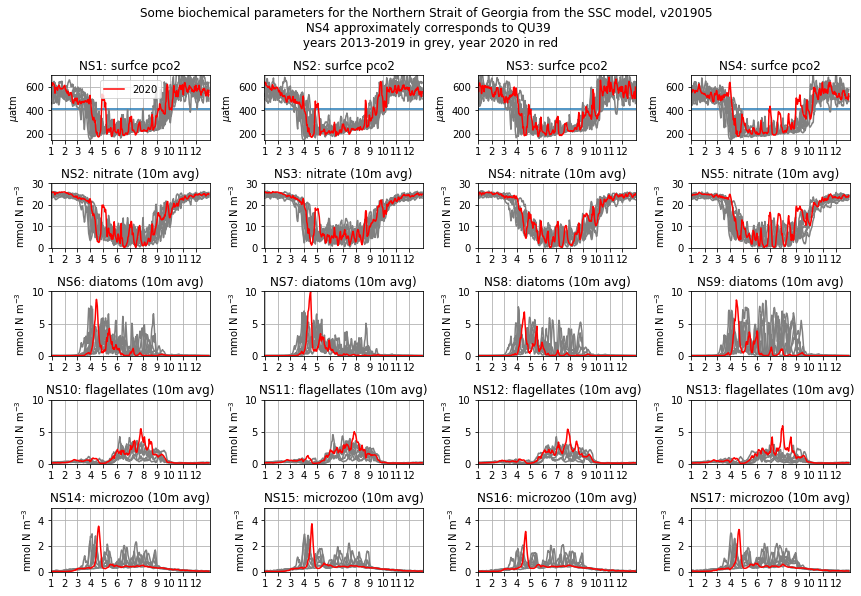

In [67]:
fact = 0.6
fig, axs = plt.subplots(5,4, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,4):
    
    axs[i].set_title(f'NS{i+1}: surfce pco2')
    axs[i].axhline(y=410); axs[i].set_ylim(150,700)
    
    axs[i].plot(np.arange(1,366,1),pco2_2013[0:365,i], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),pco2_2014[0:365,i], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),pco2_2015[0:365,i], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),pco2_2016[0:365,i], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),pco2_2017[0:365,i], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),pco2_2018[0:365,i], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),pco2_2019[0:365,i], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),pco2_2020[0:365,i], 'r-', label = '2020')
    axs[i].set_ylabel('$\mu$atm')
    
for i in range(4,8):
    axs[i].plot(np.arange(1,366,1),nit_10m_2013[0:365,i-4], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),nit_10m_2014[0:365,i-4], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),nit_10m_2015[0:365,i-4], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),nit_10m_2016[0:365,i-4], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),nit_10m_2017[0:365,i-4], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),nit_10m_2018[0:365,i-4], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),nit_10m_2019[0:365,i-4], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),nit_10m_2020[0:365,i-4], 'r-', label = '2020')    
    
    axs[i].set_title(f'NS{i-3+1}: nitrate (10m avg)')
    axs[i].set_ylim(0,30)
    axs[i].set_ylabel('mmol N m$^{-3}$')
    
for i in range(8,12):
    axs[i].plot(np.arange(1,366,1),diat_10m_2013[0:365,i-8], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),diat_10m_2014[0:365,i-8], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),diat_10m_2015[0:365,i-8], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),diat_10m_2016[0:365,i-8], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),diat_10m_2017[0:365,i-8], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),diat_10m_2018[0:365,i-8], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),diat_10m_2019[0:365,i-8], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),diat_10m_2020[0:365,i-8], 'r-', label = '2020')    
    
    axs[i].set_title(f'NS{i-3+1}: diatoms (10m avg)')
    axs[i].set_ylim(0,10)
    axs[i].set_ylabel('mmol N m$^{-3}$')

    
for i in range(12,16):
    axs[i].plot(np.arange(1,366,1),flag_10m_2013[0:365,i-12], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),flag_10m_2014[0:365,i-12], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),flag_10m_2015[0:365,i-12], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),flag_10m_2016[0:365,i-12], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),flag_10m_2017[0:365,i-12], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),flag_10m_2018[0:365,i-12], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),flag_10m_2019[0:365,i-12], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),flag_10m_2020[0:365,i-12], 'r-', label = '2020')    
    
    axs[i].set_title(f'NS{i-3+1}: flagellates (10m avg)')
    axs[i].set_ylim(0,10)
    axs[i].set_ylabel('mmol N m$^{-3}$')
    
for i in range(16,20):
    axs[i].plot(np.arange(1,366,1),microzoo_10m_2013[0:365,i-16], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),microzoo_10m_2014[0:365,i-16], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),microzoo_10m_2015[0:365,i-16], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),microzoo_10m_2016[0:365,i-16], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),microzoo_10m_2017[0:365,i-16], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),microzoo_10m_2018[0:365,i-16], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),microzoo_10m_2019[0:365,i-16], color = 'grey', linestyle ='-')
    axs[i].plot(np.arange(1,366,1),microzoo_10m_2020[0:365,i-16], 'r-', label = '2020')    
    
    axs[i].set_title(f'NS{i-3+1}: microzoo (10m avg)')
    axs[i].set_ylim(0,5)
    axs[i].set_ylabel('mmol N m$^{-3}$')
    
for i in range(0,20):
    axs[i].set_xticks(sumday)
    axs[i].set_xticklabels(np.arange(1,13,1))
    axs[i].set_xlim([0,367])
    axs[i].grid()

axs[0].legend(loc='best')

plt.suptitle('Some biochemical parameters for the Northern Strait of Georgia from the SSC model, v201905 \n NS4 approximately corresponds to QU39 \n years 2013-2019 in grey, year 2020 in red')
plt.tight_layout()

In [41]:
monday = [31,28,31,30,31,30,31,31,30,31,30,31]
sumday = np.zeros_like(monday)
for i in range(0,12):
    sumday[i] = 1+np.sum(monday[0:i])
print(sumday)

[  1  32  60  91 121 152 182 213 244 274 305 335]
